# Deliverable 2: Regression Modeling and Performance Evaluation
### MSCS 634 – Machine Learning
UCI Heart Disease Dataset
---

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

## 2. Load Dataset

In [2]:
# Load the UCI Heart Disease dataset
df = pd.read_csv("heart.csv")   # Adjust path if needed

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Basic Dataset Information

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 4. Feature Engineering

In [4]:
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Polynomial features:", X_poly.shape[1])

Original features: 13
Polynomial features: 104


## 5. Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((820, 104), (205, 104))

## 6. Build & Evaluate Regression Models

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring="neg_mean_squared_error")
    cv_rmse = np.sqrt(-cv_scores.mean())

    results.append([name, r2, rmse, cv_rmse])

results_df = pd.DataFrame(results, columns=["Model", "R²", "RMSE", "CV_RMSE"])
results_df

,Model,R²,RMSE,CV_RMSE
0,Linear Regression,0.591881,0.319417,0.298816
1,Ridge Regression,0.593226,0.318891,0.298506
2,Lasso Regression,0.601378,0.315679,0.296377


## 7. Visualizations

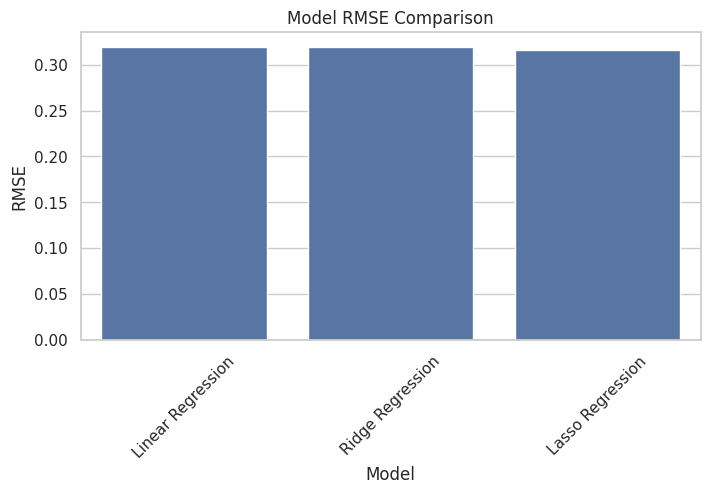

In [7]:
# RMSE Comparison
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="RMSE")
plt.title("Model RMSE Comparison")
plt.xticks(rotation=45)
plt.show()

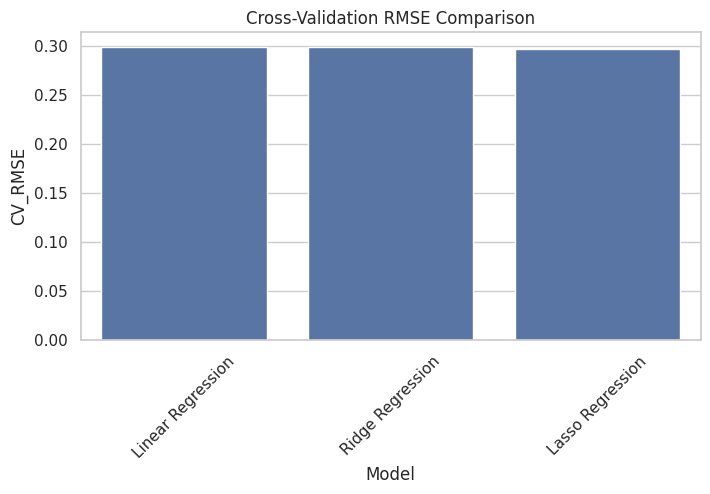

In [8]:
# Cross-Validation RMSE Comparison
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Model", y="CV_RMSE")
plt.title("Cross-Validation RMSE Comparison")
plt.xticks(rotation=45)
plt.show()

## 8. Residual Plot for Best Model

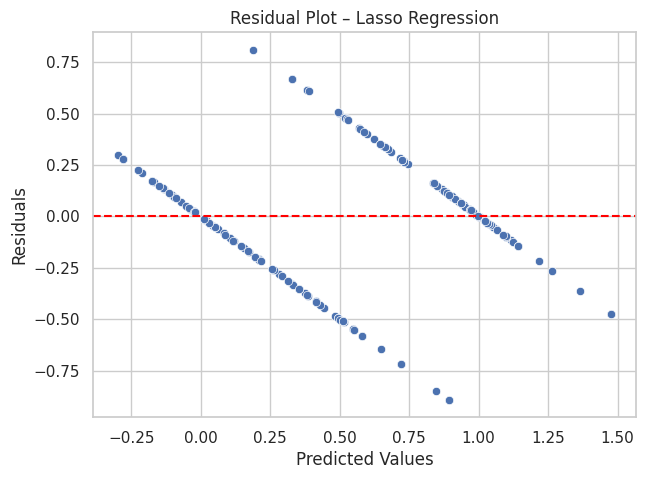

In [9]:
best_model_name = results_df.iloc[results_df['RMSE'].idxmin()]['Model']
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title(f"Residual Plot – {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## 9. Final Model Evaluation Summary

In [10]:
results_df.sort_values(by="RMSE")

,Model,R²,RMSE,CV_RMSE
2,Lasso Regression,0.601378,0.315679,0.296377
1,Ridge Regression,0.593226,0.318891,0.298506
0,Linear Regression,0.591881,0.319417,0.298816
